## Why Analyzing Fleet Demographics Matters

Understanding the basic demographics of the participants — such as their role in the fleet, fleet size, electrification level, and industry — is crucial for several reasons:

1. **User Segmentation**  
   It allows us to segment our users and stakeholders based on their operational context. A depot manager working with a 10-vehicle last-mile fleet in Sweden will likely have very different software needs and charging behaviors than a transport manager overseeing 300 vehicles across multiple depots in Germany.

2. **Tailored UX Design**  
   Knowing who the users are helps us design tools and interfaces that match their workflows, expertise levels, and responsibilities (e.g., fleet managers vs. drivers).

3. **Technology Adoption Patterns**  
   Demographics often correlate with how far along fleets are in the electrification journey, and what tools they’re using — providing insights into where support or innovation is most needed.

4. **Generalizability & Strategic Priorities**  
   Analyzing demographics ensures that we’re not over-relying on niche perspectives and helps validate that the results are representative across key market regions, particularly in Europe and North America where electrification


In [3]:
#load and inspect data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Load data
df = pd.read_csv("fleet_user_testing_data.csv")
df = df.drop(columns=["Depot Operation"])

# Show first 5 rows
df.head()

,Gender,Age,Country,Subcontracting Role,Fleet Role,Fleet Type,Industry,Fleet Size,Electrified Percentage,Charging Location,Fleet Planning Software,Charging Behavior,Battery Understanding (1-5),Driver Charging Roles
0,Non-Binary,53,Poland,my fleet is both subcontracted out and has its...,Transport manager,First mile,Food & beverages,20-99,0-10%,planned onsite charging,TomTom Telematics,until they have enough range for the next tour,1,drivers are subject to strict delivery windows...
1,Male,35,Norway,my fleet has no contact with a subcontracted f...,Fleet analyst,First mile,Retail,20-99,0-10%,planned onsite charging,WorkWave Route Manager,until the departure time for the next tour,1,drivers determine when the charging session be...
2,Female,56,Australia,my fleet is subcontracted out to a depot,Driver,mid mile,Food & beverages,100 or more,76-100%,spontaneous offsite charging,Descartes Route Planner,until 100%,4,drivers determine when the charging session be...
3,Non-Binary,47,Australia,my fleet is both subcontracted out and has its...,Logistics manager,last mile,Food & beverages,100 or more,76-100%,spontaneous onsite charging,ORTEC,until 100%,4,drivers are responsible for finding offsite / ...
4,Female,40,Mexico,my fleet is subcontracted out to a depot,Lead Logistics coordinator,last mile,Retail,20-99,51-75%,spontaneous onsite charging,Fleet Complete,until the departure time for the next tour,3,drivers are responsible for finding offsite / ...


In [4]:
print(df.columns.tolist())


['Gender', 'Age', 'Country', 'Subcontracting Role', 'Fleet Role', 'Fleet Type', 'Industry', 'Fleet Size', 'Electrified Percentage', 'Charging Location', 'Fleet Planning Software', 'Charging Behavior', 'Battery Understanding (1-5)', 'Driver Charging Roles']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid")
palette = "Set2"

# Classify regions with small function
scandinavia = ['Sweden', 'Norway', 'Finland', 'Denmark']
europe = ['Germany', 'France', 'Netherlands', 'UK', 'Spain', 'Italy', 'Belgium', 'Austria', 'Switzerland', 'Ireland', 'Poland'] + scandinavia

def classify_region(country):
    if country in scandinavia:
        return 'Scandinavia'
    elif country in europe:
        return 'Rest of Europe'
    else:
        return 'Outside Europe'

df['Region'] = df['Country'].apply(classify_region)


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/1903597901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette=palette)


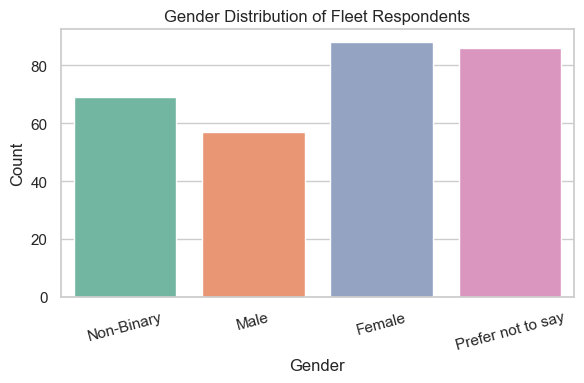

In [6]:
#gender distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", palette=palette)
plt.title("Gender Distribution of Fleet Respondents")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


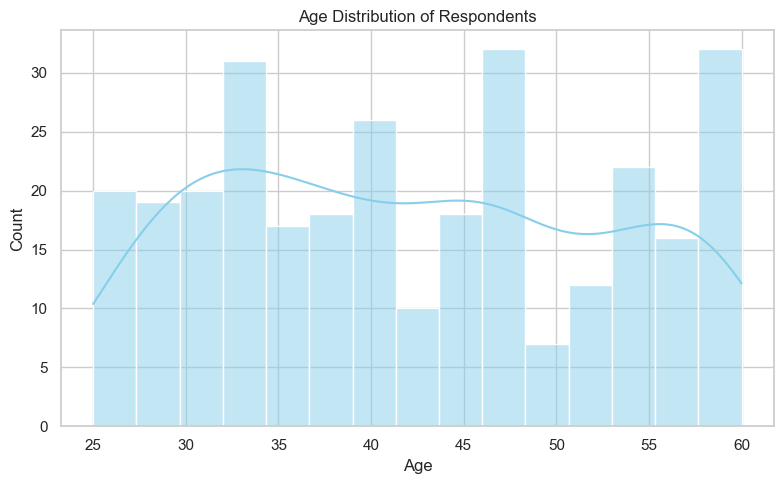

In [7]:
#age

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", bins=15, kde=True, color="skyblue")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/3725266615.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=role_counts, x="Fleet Role", y="Count", palette="light:#5A9")


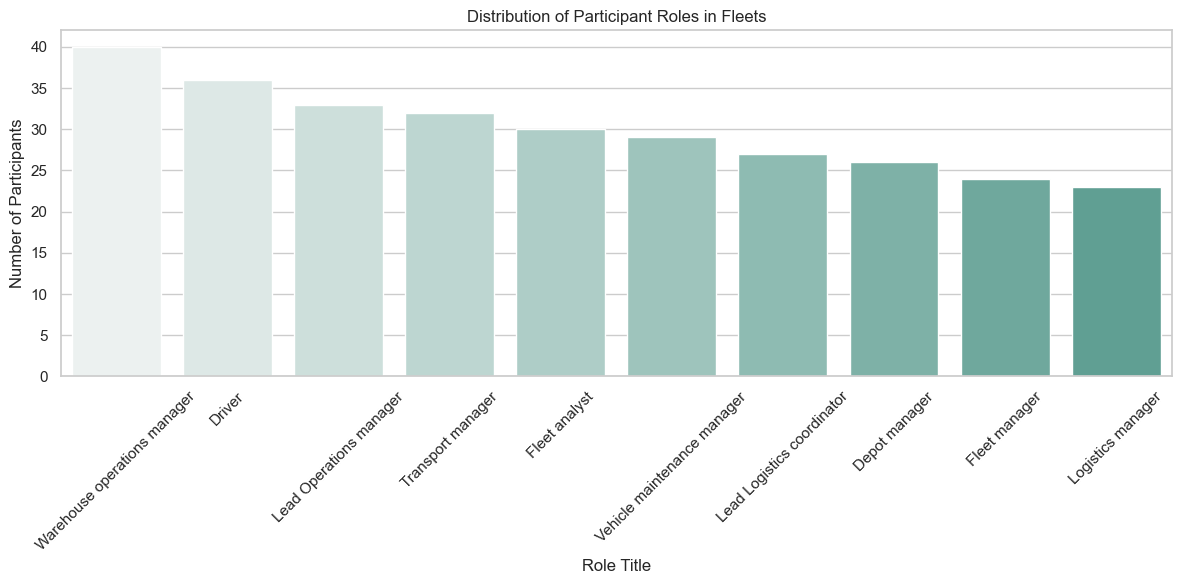

In [10]:
#Roles of the participants in the fleet
role_col = "Fleet Role"

# Count frequency of each role
role_counts = df[role_col].value_counts().reset_index()
role_counts.columns = ["Fleet Role", "Count"]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=role_counts, x="Fleet Role", y="Count", palette="light:#5A9")
plt.title("Distribution of Participant Roles in Fleets")
plt.xlabel("Role Title")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/3414186690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


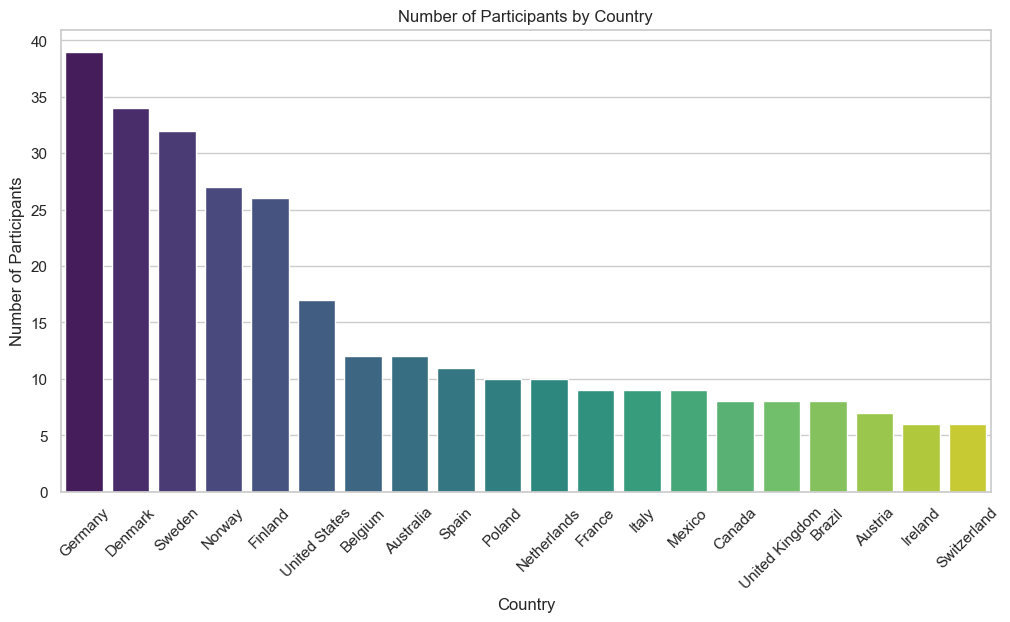

In [11]:
#countries sampled 
plt.figure(figsize=(12,6))
country_counts = df['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Number of Participants by Country")
plt.ylabel("Number of Participants")
plt.xlabel("Country")
plt.show()

/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/2250098691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Region", palette=palette, order=df['Region'].value_counts().index)


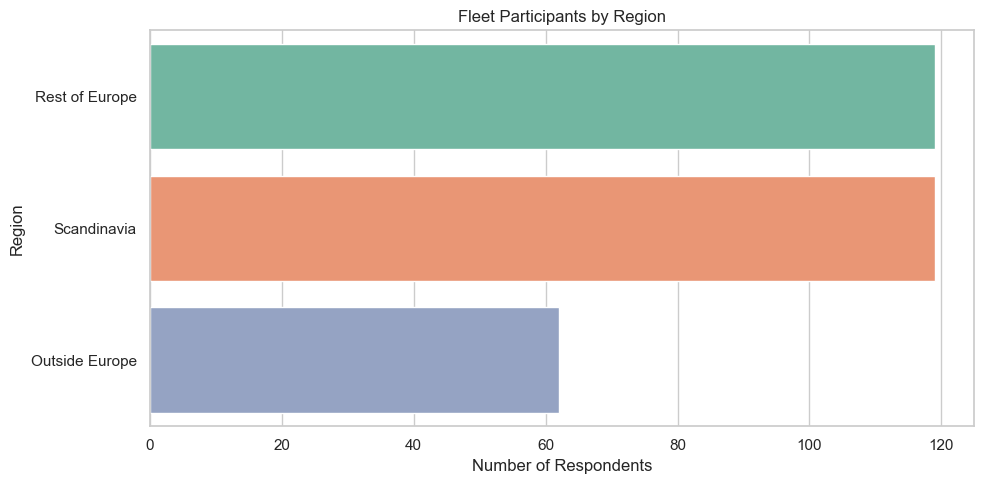

In [12]:
#country / geography distribution

plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Region", palette=palette, order=df['Region'].value_counts().index)
plt.title("Fleet Participants by Region")
plt.xlabel("Number of Respondents")
plt.tight_layout()
plt.show()



/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/3649214623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fleet Size", palette=palette,


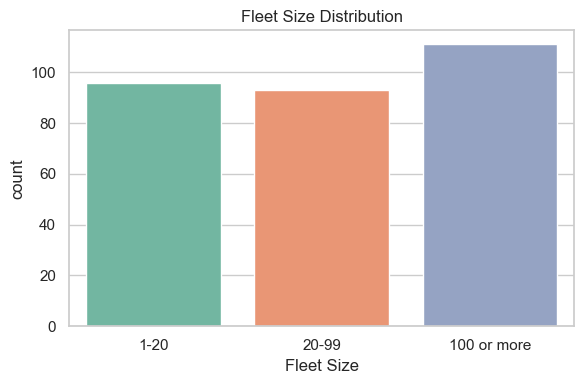

In [13]:
#Fleet size 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fleet Size", palette=palette,
              order=["1-20", "20-99", "100 or more"])
plt.title("Fleet Size Distribution")
plt.tight_layout()
plt.show()


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/2766651584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fleet Type", palette=palette)


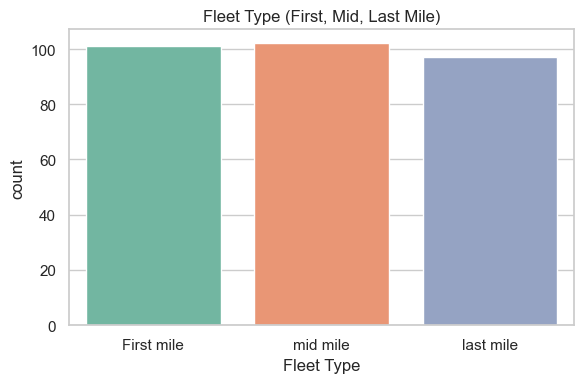

In [14]:
#fleet type

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fleet Type", palette=palette)
plt.title("Fleet Type (First, Mid, Last Mile)")
plt.tight_layout()
plt.show()



/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/2696101086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Industry", palette=palette, order=df['Industry'].value_counts().index)


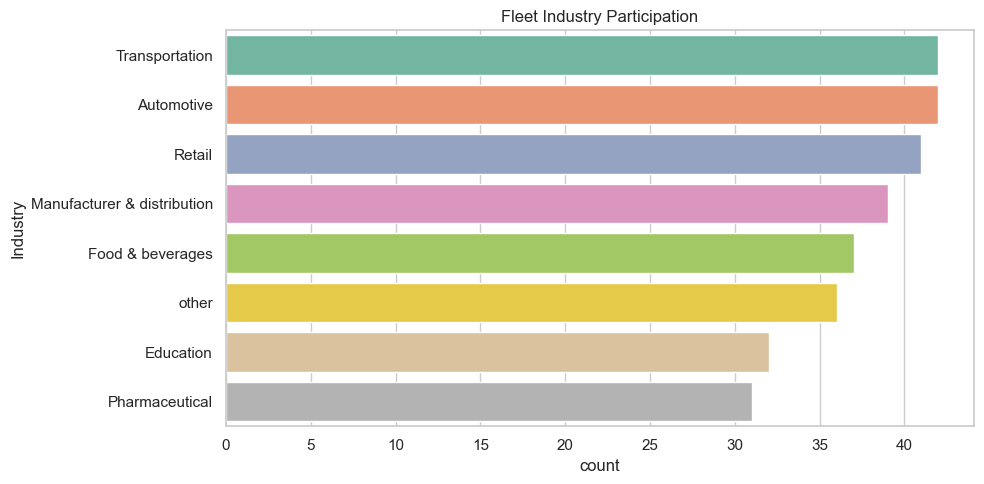

In [15]:
#industry breakdown

plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Industry", palette=palette, order=df['Industry'].value_counts().index)
plt.title("Fleet Industry Participation")
plt.tight_layout()
plt.show()


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/2590045031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Electrified Percentage", palette="coolwarm",


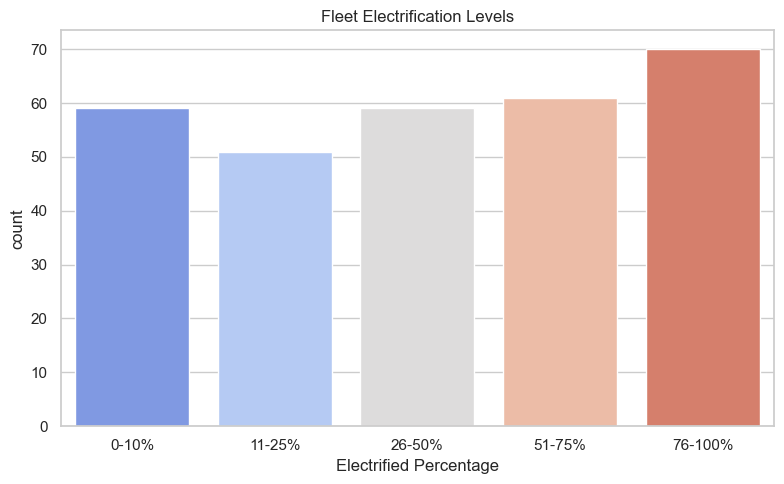

In [16]:
#Electrification level

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Electrified Percentage", palette="coolwarm",
              order=["0-10%", "11-25%", "26-50%", "51-75%", "76-100%"])
plt.title("Fleet Electrification Levels")
plt.tight_layout()
plt.show()


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/2555835631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Subcontracting Role", palette=palette,


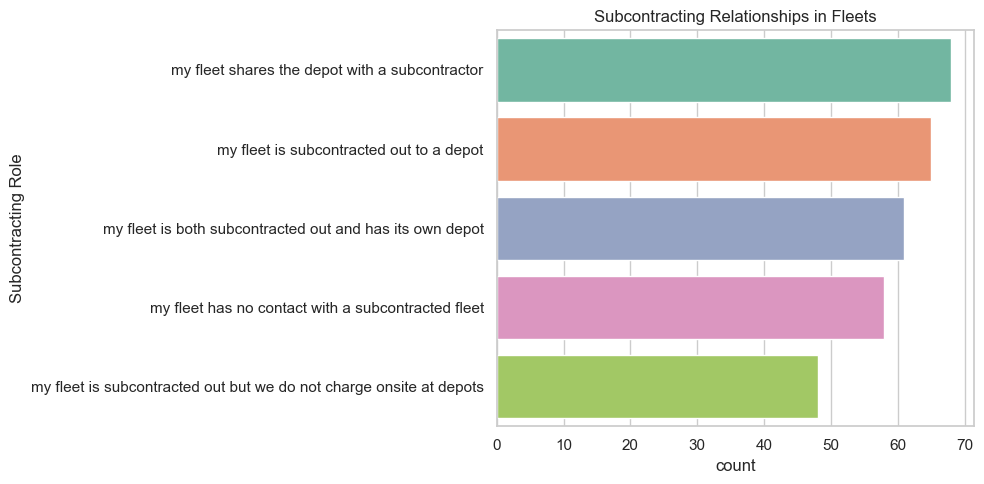

In [17]:
#Subcontracting setup
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Subcontracting Role", palette=palette,
              order=df['Subcontracting Role'].value_counts().index)
plt.title("Subcontracting Relationships in Fleets")
plt.tight_layout()
plt.show()



/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13061/1605286398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tool_counts.index, y=tool_counts.values, palette='plasma')


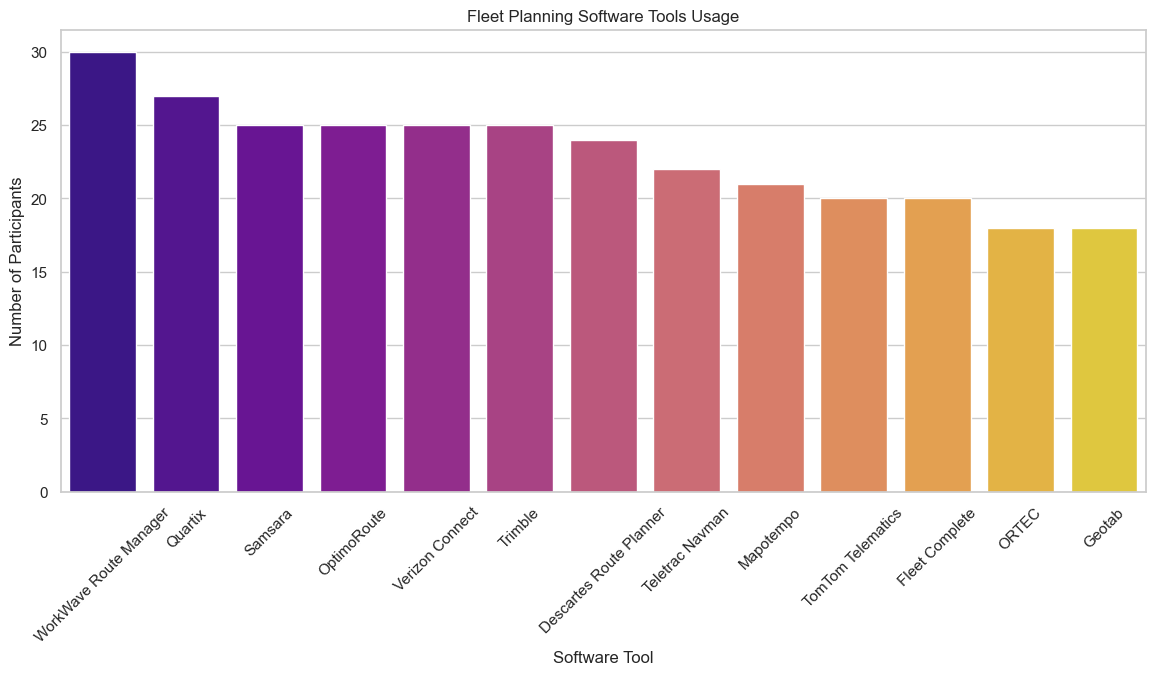

In [18]:
#Fleet management software tools 
plt.figure(figsize=(14,6))
tool_counts = df['Fleet Planning Software'].value_counts()
sns.barplot(x=tool_counts.index, y=tool_counts.values, palette='plasma')
plt.xticks(rotation=45)
plt.title("Fleet Planning Software Tools Usage")
plt.ylabel("Number of Participants")
plt.xlabel("Software Tool")
plt.show()

## Demographic & Fleet Setup Summary

This section summarizes the makeup of respondents and their fleets:
- **Gender and age** distributions indicate respondent diversity.
- **Regional participation** shows strong responses from Scandinavia and the rest of Europe.
- Fleets are mostly **mid-sized**, with a balance of **first-, mid-, and last-mile** operations.
- **Electrification** levels vary, with some fleets fully electrified and others just starting.
- The **subcontracting structure** and **depot-based operations** provide insight into fleet logistics setups.

## Fleet Software Landscape

Participants were asked to describe which software tools they currently use to manage fleet operations and charging.

### Key Findings:
- The software ecosystem is fragmented, with several known platforms (e.g., **Geotab, Routific, Webfleet, SAP TM**) mentioned frequently.
- Some fleets rely on **in-house solutions** or **basic spreadsheets**, especially among smaller or mid-sized fleets.
- A few emerging platforms (e.g., **ChargePoint, ViriCiti, GreenFlux**) are beginning to show up, particularly among fleets with higher electrification levels (these findings surfaced in interviews)
